<a href="https://colab.research.google.com/github/NishaniKasineshan/DeepLearning-Projects/blob/main/Car_or_Truck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
! cp kaggle.json ~/.kaggle/

In [12]:
! chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle datasets download -d ryanholbrook/car-or-truck

 89% 69.0M/77.7M [00:02<00:00, 45.8MB/s]
100% 77.7M/77.7M [00:02<00:00, 39.8MB/s]


In [14]:
!unzip car-or-truck.zip

Streaming output truncated to the last 5000 lines.
  inflating: valid/Car/05205.jpeg    
  inflating: valid/Car/05206.jpeg    
  inflating: valid/Car/05208.jpeg    
  inflating: valid/Car/05213.jpeg    
  inflating: valid/Car/05214.jpeg    
  inflating: valid/Car/05217.jpeg    
  inflating: valid/Car/05218.jpeg    
  inflating: valid/Car/05219.jpeg    
  inflating: valid/Car/05221.jpeg    
  inflating: valid/Car/05222.jpeg    
  inflating: valid/Car/05225.jpeg    
  inflating: valid/Car/05226.jpeg    
  inflating: valid/Car/05227.jpeg    
  inflating: valid/Car/05228.jpeg    
  inflating: valid/Car/05234.jpeg    
  inflating: valid/Car/05236.jpeg    
  inflating: valid/Car/05238.jpeg    
  inflating: valid/Car/05239.jpeg    
  inflating: valid/Car/05241.jpeg    
  inflating: valid/Car/05242.jpeg    
  inflating: valid/Car/05245.jpeg    
  inflating: valid/Car/05248.jpeg    
  inflating: valid/Car/05249.jpeg    
  inflating: valid/Car/05250.jpeg    
  inflating: valid/Car/05252.jpeg    

In [15]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [16]:
# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

In [17]:
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

In [18]:
# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    '/content/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    '/content/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [19]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Define Pretrained Base

The pretrained model used is called VGG16.

In [20]:
!kaggle datasets download -d ryanholbrook/cv-course-models

100% 479M/481M [00:12<00:00, 44.5MB/s]
100% 481M/481M [00:12<00:00, 41.0MB/s]


In [21]:
!unzip cv-course-models.zip

Archive:  cv-course-models.zip
  inflating: cv-course-models/.ipynb_checkpoints/encyclopedia-of-course-models-checkpoint.ipynb  
  inflating: cv-course-models/.ipynb_checkpoints/inceptionv1-checkpoint.ipynb  
  inflating: cv-course-models/.ipynb_checkpoints/inceptionv1-checkpoint.md  
  inflating: cv-course-models/.ipynb_checkpoints/minivgg-bn-checkpoint.ipynb  
  inflating: cv-course-models/.ipynb_checkpoints/minivgg-bn-checkpoint.md  
  inflating: cv-course-models/.ipynb_checkpoints/minivgg-checkpoint.ipynb  
  inflating: cv-course-models/.ipynb_checkpoints/minivgg-checkpoint.md  
  inflating: cv-course-models/.ipynb_checkpoints/simple-cnn-bn-checkpoint.ipynb  
  inflating: cv-course-models/.ipynb_checkpoints/simple-cnn-bn-checkpoint.md  
  inflating: cv-course-models/.ipynb_checkpoints/simple-cnn-checkpoint.ipynb  
  inflating: cv-course-models/.ipynb_checkpoints/simple-cnn-checkpoint.md  
  inflating: cv-course-models/.ipynb_checkpoints/vgg16-checkpoint.ipynb  
  inflating: cv-cour

In [22]:
pretrained_base = tf.keras.models.load_model(
    '/content/cv-course-models/vgg16-pretrained-base',
)
pretrained_base.trainable = False

Attach Head

we'll use a layer of hidden units (the first Dense layer) followed by a layer to transform the outputs to a probability score for class 1, Truck.
 
The Flatten layer transforms the two dimensional outputs of the base into the one dimensional inputs needed by the head.

In [23]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

Training the model

Since this is a two-class problem, we'll use the binary versions of crossentropy and accuracy. 

In [26]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30
)
history

Epoch 1/30
80/80 [==============================] - 31s 386ms/step - loss: 0.2173 - binary_accuracy: 0.9060 - val_loss: 0.3132 - val_binary_accuracy: 0.8699
Epoch 2/30
80/80 [==============================] - 30s 382ms/step - loss: 0.1685 - binary_accuracy: 0.9371 - val_loss: 0.3130 - val_binary_accuracy: 0.8727
Epoch 3/30
80/80 [==============================] - 30s 379ms/step - loss: 0.1492 - binary_accuracy: 0.9482 - val_loss: 0.3142 - val_binary_accuracy: 0.8743
Epoch 4/30
80/80 [==============================] - 31s 384ms/step - loss: 0.1334 - binary_accuracy: 0.9568 - val_loss: 0.3170 - val_binary_accuracy: 0.8727
Epoch 5/30
80/80 [==============================] - 30s 379ms/step - loss: 0.1205 - binary_accuracy: 0.9644 - val_loss: 0.3206 - val_binary_accuracy: 0.8707
Epoch 6/30
80/80 [==============================] - 31s 383ms/step - loss: 0.1098 - binary_accuracy: 0.9707 - val_loss: 0.3249 - val_binary_accuracy: 0.8695
Epoch 7/30
80/80 [==============================] - 30s 38

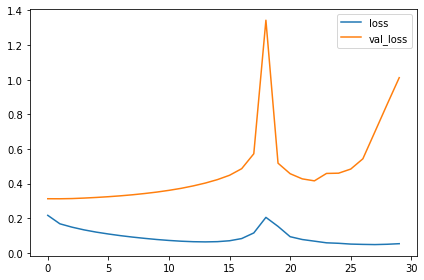

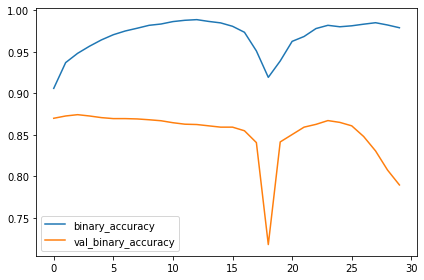

In [27]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

Testing inceptionv1 pretrained model

In [28]:
pretrained_base = tf.keras.models.load_model(
    '/content/cv-course-models/inceptionv1',
)
pretrained_base.trainable = False

In [29]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [30]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30
)
history

Epoch 1/30
80/80 [==============================] - 13s 93ms/step - loss: 0.4912 - binary_accuracy: 0.7571 - val_loss: 0.4131 - val_binary_accuracy: 0.8190
Epoch 2/30
80/80 [==============================] - 5s 64ms/step - loss: 0.3909 - binary_accuracy: 0.8231 - val_loss: 0.3836 - val_binary_accuracy: 0.8349
Epoch 3/30
80/80 [==============================] - 5s 64ms/step - loss: 0.3629 - binary_accuracy: 0.8407 - val_loss: 0.3683 - val_binary_accuracy: 0.8390
Epoch 4/30
80/80 [==============================] - 5s 64ms/step - loss: 0.3436 - binary_accuracy: 0.8513 - val_loss: 0.3591 - val_binary_accuracy: 0.8452
Epoch 5/30
80/80 [==============================] - 5s 65ms/step - loss: 0.3289 - binary_accuracy: 0.8626 - val_loss: 0.3512 - val_binary_accuracy: 0.8483
Epoch 6/30
80/80 [==============================] - 5s 64ms/step - loss: 0.3171 - binary_accuracy: 0.8691 - val_loss: 0.3447 - val_binary_accuracy: 0.8505
Epoch 7/30
80/80 [==============================] - 5s 64ms/step - lo

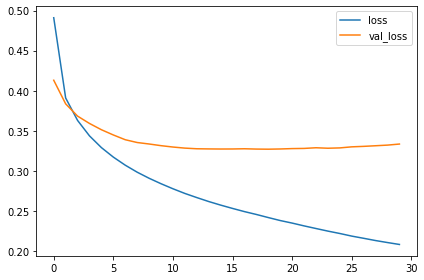

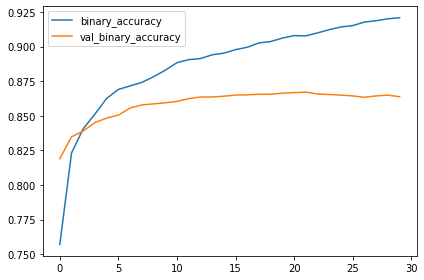

In [31]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

We can see difference between the learning curves from inceptionv1 and learing curves from VGG16.

Explanation:

The training loss and validation loss stay fairly close is evidence that the model isn't just memorizing the training data, but rather learning general properties of the two classes.